In [70]:
#Imports
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
% matplotlib inline

In [71]:
df = pd.read_csv('ocb_-_first_sheet.csv') #Read training datadet in dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 8 columns):
Date                  9600 non-null int64
Family_Type           9600 non-null object
N_Children            9600 non-null object
Fam_NetIncome         9600 non-null object
N_families            9600 non-null object
N_ChildrenExclude     9600 non-null object
N_Children_Include    9600 non-null object
Calc_EntitledAmt      9600 non-null object
dtypes: int64(1), object(7)
memory usage: 600.1+ KB
None


,Date,Family_Type,N_Children,Fam_NetIncome,N_families,N_ChildrenExclude,N_Children_Include,Calc_EntitledAmt
0,201107,Single-Parent Family,1 CHILD (2),LOSS OR NIL,7110,7070,20,804000
1,201107,Single-Parent Family,1 CHILD (2),>$ 0 TO $10000,35400,35090,150,3701000
2,201107,Single-Parent Family,1 CHILD (2),>$10000 TO $12000,15120,14990,70,1498000
3,201107,Single-Parent Family,1 CHILD (2),>$12000 TO $14000,11070,10970,50,1128000
4,201107,Single-Parent Family,1 CHILD (2),>$14000 TO $16000,10120,10010,60,1019000


In [72]:
#Create a new column named 'Fiscal_year' based on government fiscal year 
#which is July to June
fiscal_year = []
for i in df.Date:
    if i >= 201107  and i <= 201206:
        fiscal_year.append(2011)        
    elif i >= 201207  and i <= 201306:
        fiscal_year.append(2012)
    elif i >= 201307  and i <= 201406:
        fiscal_year.append(2013)
    elif i >= 201407  and i <= 201506:
        fiscal_year.append(2014)
    elif i >= 201507  and i <= 201606:
        fiscal_year.append(2015)

df['Fiscal_year'] = fiscal_year
df.head()

,Date,Family_Type,N_Children,Fam_NetIncome,N_families,N_ChildrenExclude,N_Children_Include,Calc_EntitledAmt,Fiscal_year
0,201107,Single-Parent Family,1 CHILD (2),LOSS OR NIL,7110,7070,20,804000,2011
1,201107,Single-Parent Family,1 CHILD (2),>$ 0 TO $10000,35400,35090,150,3701000,2011
2,201107,Single-Parent Family,1 CHILD (2),>$10000 TO $12000,15120,14990,70,1498000,2011
3,201107,Single-Parent Family,1 CHILD (2),>$12000 TO $14000,11070,10970,50,1128000,2011
4,201107,Single-Parent Family,1 CHILD (2),>$14000 TO $16000,10120,10010,60,1019000,2011


###### Question 1: Which fiscal year has the high or lowest amount entitlement?
Process of how to calculate the mean of Calc_EntitleAmt for each fiscal year: 
1. Changed the data type of 'Calc_EntitledAmt' from String to numeric.
2. Replace the 'X' with '0' for column 'Calc_EntitledAmt'.
3. Calculated the mean 'Calc_EntitledAmt' based on the 'Fiscal_Year'.
4. Printing the output.
5. Plotting graph.

###### Answer 1: Highest - 2014 and Lowest - 2012

   Fiscal_year  Calc_EntitledAmt
0         2011     469935.937500
1         2012     462204.687500
2         2013     506633.333333
3         2014     553504.166667
4         2015     514502.083333


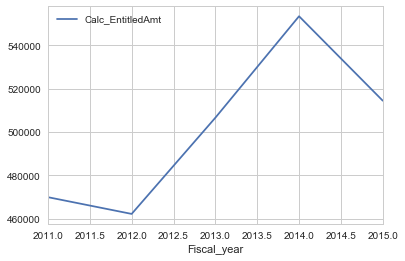

In [73]:
#df['Month'] = (pd.to_datetime(df['Date'].apply(str), format='%Y%m')).dt.month #Extract the Month from the Date field
df.loc[df['Calc_EntitledAmt']=='x','Calc_EntitledAmt'] = '0'        #Replace all 'x' in Calc_EntitledAmt with '0'   
df['Calc_EntitledAmt'] = pd.to_numeric(df['Calc_EntitledAmt'])      #Convert the Calc_EntitleAmt to numeric type    
Mean_Yearly_Eamt = df.groupby('Fiscal_year', as_index=False)['Calc_EntitledAmt'].mean() #Calculate the mean of Calc_EntitleAmt for each year
print(Mean_Yearly_Eamt)
Mean_Yearly_Eamt.plot('Fiscal_year', 'Calc_EntitledAmt')                                          #Plot the graph
plt.show()

###### Question 2: Average number of families recieving the benefits based on the Fiscal year? 
Process of how to calculate the mean of N_families participating for each fiscal year: 
1. Changed the data type of 'N_families' from String to numeric.
2. Replace the 'X' with '0' for column 'N_families'.
3. Calculated the mean 'N_families' based on the 'Fiscal_Year'.
4. Printing the output.
5. Plotting graph.

###### Answer 2: Highest - 2011 and 2014 and Lowest - 2012. Which explains the entitlement amount increased in the Question 1.

   Fiscal_year   N_families
0         2011  3259.151042
1         2012  3177.791667
2         2013  3202.463542
3         2014  3252.067708
4         2015  3218.661458


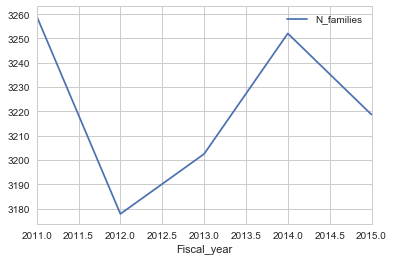

In [74]:
df.loc[df['N_families']=='x','N_families'] = '0'
df['N_families'] = pd.to_numeric(df['N_families'])                    #Convert the N_families to numeric type    
mean_n_families = df.groupby('Fiscal_year', as_index=False)['N_families'].mean() #Calculate the mean of N_families for each year
print(mean_n_families)
mean_n_families.plot('Fiscal_year', 'N_families')                                    #Plot the graph
plt.show()

###### Question 3: Average per child entitlement based on the number of children and fiscal year. ???? change it
Process: 
1. Calculate the amount entitlement per child (approximate value)by dividng the Calc_EntitledAmt by number of families.
2. Calculated the mean 'Entitled_per_child' based on the 'Fiscal_Year' and 'Family_Type'.
3. Printing the output.
4. Plotting graph.

###### Answer 3: The entitlement amount per child was little higher for the two parents family than the single parent family fro every year.

   Fiscal_year           Family_Type  Entitled_per_child
0         2011  Single-Parent Family          242.888967
1         2011   Two Parent Families          247.851586
2         2012  Single-Parent Family          245.897066
3         2012   Two Parent Families          249.085659
4         2013  Single-Parent Family          272.931910
5         2013   Two Parent Families          277.197532
6         2014  Single-Parent Family          297.909038
7         2014   Two Parent Families          303.130240
8         2015  Single-Parent Family          283.544473
9         2015   Two Parent Families          291.445308


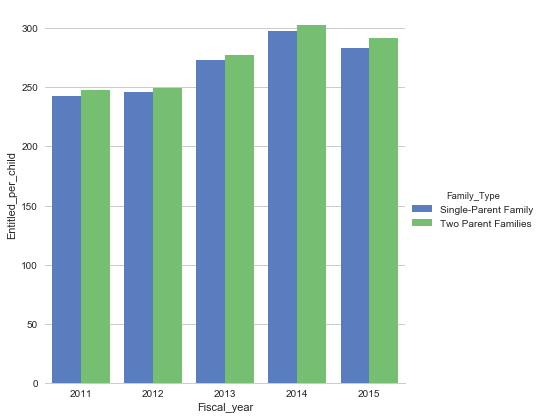

In [75]:
df['Entitled_per_child'] = (df.Calc_EntitledAmt/df.N_families).fillna(0)

Mean_Fam_Type_per_year = df.groupby(['Fiscal_year','Family_Type'], as_index=False)['Entitled_per_child'].mean()
print(Mean_Fam_Type_per_year)
sns.set(style="whitegrid")
g = sns.factorplot(x="Fiscal_year", y="Entitled_per_child", hue="Family_Type", data=Mean_Fam_Type_per_year,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Entitled_per_child")

In [76]:
ocb_df = df

#Family Type
ocb_df.loc[ocb_df['Family_Type']=='Single-Parent Family','Family_Type'] = '1' 
ocb_df.loc[ocb_df['Family_Type']=='Two Parent Families','Family_Type'] = '2'

#Number of children
ocb_df.loc[ocb_df['N_Children']=='    1 CHILD (2)    ','N_Children'] = '1' 
ocb_df.loc[ocb_df['N_Children']=='  2 CHILDREN (2)   ','N_Children'] = '2'
ocb_df.loc[ocb_df['N_Children']=='  3 CHILDREN (2)   ','N_Children'] = '3' 
ocb_df.loc[ocb_df['N_Children']=='  4 CHILDREN (2)   ','N_Children'] = '4'
ocb_df.loc[ocb_df['N_Children']=='  5+ CHILDREN (2)  ','N_Children'] = '5'

#Family Income
ocb_df.loc[ocb_df['Fam_NetIncome']=='LOSS OR NIL        ','Fam_NetIncome'] = '1'
ocb_df.loc[ocb_df['Fam_NetIncome']==' LOSS OR NIL         ','Fam_NetIncome'] = '1'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$    0 TO $10000  ','Fam_NetIncome'] = '2'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$    0 TO $10000   ','Fam_NetIncome'] = '2'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$10000 TO $12000  ','Fam_NetIncome'] = '3'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$10000 TO $12000   ','Fam_NetIncome'] = '3'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$12000 TO $14000  ','Fam_NetIncome'] = '4'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$12000 TO $14000   ','Fam_NetIncome'] = '4'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$14000 TO $16000  ','Fam_NetIncome'] = '5'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$14000 TO $16000   ','Fam_NetIncome'] = '5'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$16000 TO $18000  ','Fam_NetIncome'] = '6'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$16000 TO $18000   ','Fam_NetIncome'] = '6'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$18000 TO $20000  ','Fam_NetIncome'] = '7'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$18000 TO $20000   ','Fam_NetIncome'] = '7'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$20000 TO $22000  ','Fam_NetIncome'] = '8'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$20000 TO $22000   ','Fam_NetIncome'] = '8'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$22000 TO $24000  ','Fam_NetIncome'] = '9'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$22000 TO $24000   ','Fam_NetIncome'] = '9'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$24000 TO $26000  ','Fam_NetIncome'] = '10'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$24000 TO $26000   ','Fam_NetIncome'] = '10'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$26000 TO $28000  ','Fam_NetIncome'] = '11'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$26000 TO $28000   ','Fam_NetIncome'] = '11' 
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$28000 TO $30000  ','Fam_NetIncome'] = '12'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$28000 TO $30000   ','Fam_NetIncome'] = '12'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$30000 TO $40000  ','Fam_NetIncome'] = '13'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$30000 TO $40000   ','Fam_NetIncome'] = '13'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$40000 TO $50000  ','Fam_NetIncome'] = '14'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$40000 TO $50000   ','Fam_NetIncome'] = '14'
ocb_df.loc[ocb_df['Fam_NetIncome']=='>$50000 TO $60000  ','Fam_NetIncome'] = '15'
ocb_df.loc[ocb_df['Fam_NetIncome']==' >$50000 TO $60000   ','Fam_NetIncome'] = '15'
ocb_df.loc[ocb_df['Fam_NetIncome']=='OVER $60000        ','Fam_NetIncome'] = '16'
ocb_df.loc[ocb_df['Fam_NetIncome']==' OVER $60000         ','Fam_NetIncome'] = '16'

ocb_df['Family_Type'] = pd.to_numeric(ocb_df['Family_Type'])
ocb_df['N_Children'] = pd.to_numeric(ocb_df['N_Children'])
ocb_df['Fam_NetIncome'] = pd.to_numeric(ocb_df['Fam_NetIncome'])


###### Question 4: Average per child entitlement based on the number of children and fiscal year.
Process: 
1. Calculated the mean 'Entitled_per_child' based on the 'Fiscal_Year' and 'N_Children'.
2. Printing the output.
3. Plotting graph.

   Fiscal_year  N_Children  Entitled_per_child
0         2011           1           66.313172
1         2011           2          145.215519
2         2011           3          232.125780
3         2011           4          323.947626
4         2011           5          459.249285
5         2012           1           66.497820
6         2012           2          145.782836
7         2012           3          232.256299
8         2012           4          325.955106
9         2012           5          466.964750


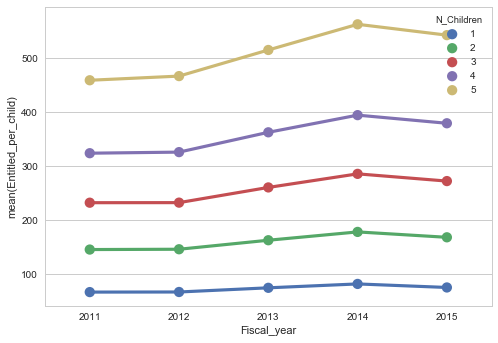

In [77]:
Mean_N_Children_per_year = ocb_df.groupby(['Fiscal_year','N_Children'], as_index=False)['Entitled_per_child'].mean() 

#TO DO - change the variable name Entitled_per_child to Entitled_per_family

print(Mean_N_Children_per_year.head(10))
sns.pointplot(x=Mean_N_Children_per_year.Fiscal_year, y=Mean_N_Children_per_year.Entitled_per_child, hue=Mean_N_Children_per_year.N_Children, data=Mean_N_Children_per_year);

###### Question 5: Average per child entitlement based on the number of children and fiscal year.
Process: 
1. Calculate the amount entitlement based per child and family (approximate value) by dividng the Entitled_per_child by number of children.
2. Calculated the mean of 'Entitled_per_c' based on the 'Fiscal_Year', 'Fam_NetIncome' and 'Family_Type'.
3. Select only row for single parent family and assign to dataframe single_parent_family.
4. Select only row for two parent family and assign to dataframe two_parent_family.
5. Printing the output.
6. Plotting graph.

###### Answer 5: The entitlement amount per child was little higher for the two parents family than the single parent family fro every year.

   Fiscal_year  Family_Type  Fam_NetIncome  Entitled_Amt_based_childrens
0         2011            1              1                    105.015320
1         2011            1              2                     99.727489
2         2011            1              3                     98.124531
3         2011            1              4                     97.675991
4         2011            1              5                     98.405347

    Fiscal_year  Family_Type  Fam_NetIncome  Entitled_Amt_based_childrens
16         2011            2              1                    109.676296
17         2011            2              2                    105.025651
18         2011            2              3                    101.525880
19         2011            2              4                    101.417758
20         2011            2              5                    101.183667


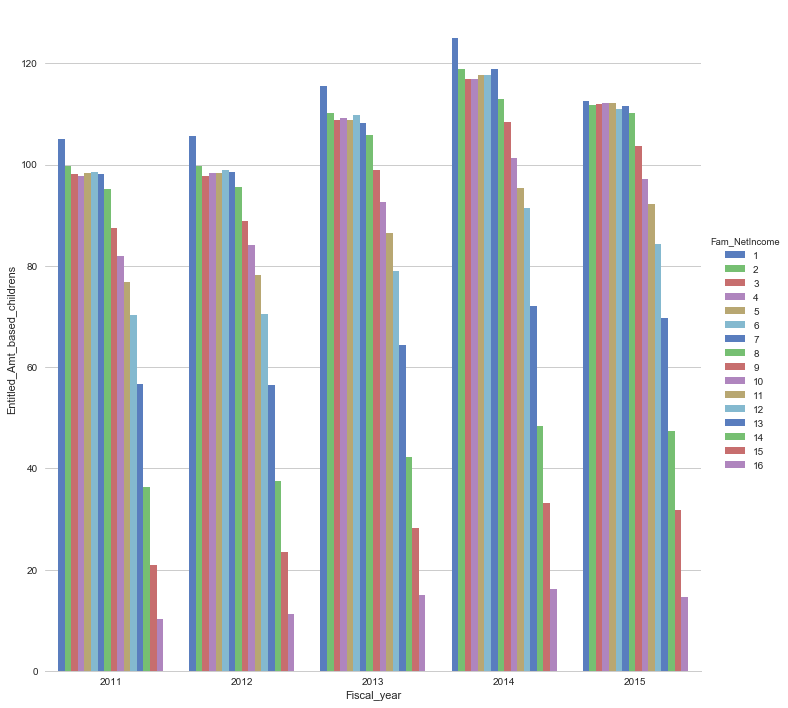

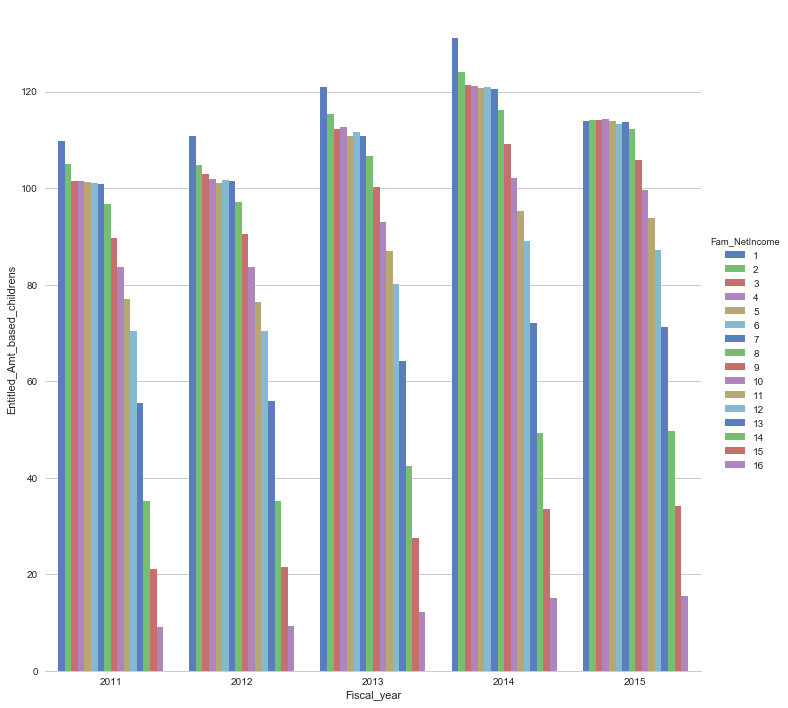

In [78]:
ocb_df['Entitled_Amt_based_childrens'] = (ocb_df.Entitled_per_child/ocb_df.N_Children)

all_df = ocb_df.groupby(['Fiscal_year','Family_Type', 'Fam_NetIncome'], as_index=False)['Entitled_Amt_based_childrens'].mean()

single_parent_family = all_df.loc[df['Family_Type'] == 1]
two_parent_family = all_df.loc[df['Family_Type'] == 2]

print(single_parent_family.head())
sns.set(style="whitegrid")
g = sns.factorplot(x="Fiscal_year", y="Entitled_Amt_based_childrens", hue="Fam_NetIncome", data=single_parent_family,
                   size=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Entitled_Amt_based_childrens")
print()
print(two_parent_family.head())
g1 = sns.factorplot(x="Fiscal_year", y="Entitled_Amt_based_childrens", hue="Fam_NetIncome", data=two_parent_family,
                   size=10, kind="bar", palette="muted")
g1.despine(left=True)
g1.set_ylabels("Entitled_Amt_based_childrens")

In [87]:
'''n_c = ocb_df.groupby(['Fiscal_year','N_Children'], as_index=False)['Entitled_Amt_based_childrens'].mean()
sns.set(style="whitegrid")
g = sns.factorplot(x="Fiscal_year", y="Entitled_Amt_based_childrens", hue="N_Children", data=n_c,
                   size=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Entitled_Amt_based_childrens")'''

'n_c = ocb_df.groupby([\'Fiscal_year\',\'N_Children\'], as_index=False)[\'Entitled_Amt_based_childrens\'].mean()\nsns.set(style="whitegrid")\ng = sns.factorplot(x="Fiscal_year", y="Entitled_Amt_based_childrens", hue="N_Children", data=n_c,\n                   size=10, kind="bar", palette="muted")\ng.despine(left=True)\ng.set_ylabels("Entitled_Amt_based_childrens")'

In [80]:
ocb_df = ocb_df[ocb_df.Entitled_per_child > 0]
X_train, X_test = train_test_split(ocb_df, test_size=0.20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7241 entries, 4363 to 3081
Data columns (total 11 columns):
Date                            7241 non-null int64
Family_Type                     7241 non-null int64
N_Children                      7241 non-null int64
Fam_NetIncome                   7241 non-null int64
N_families                      7241 non-null int64
N_ChildrenExclude               7241 non-null object
N_Children_Include              7241 non-null object
Calc_EntitledAmt                7241 non-null int64
Fiscal_year                     7241 non-null int64
Entitled_per_child              7241 non-null float64
Entitled_Amt_based_childrens    7241 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 678.8+ KB


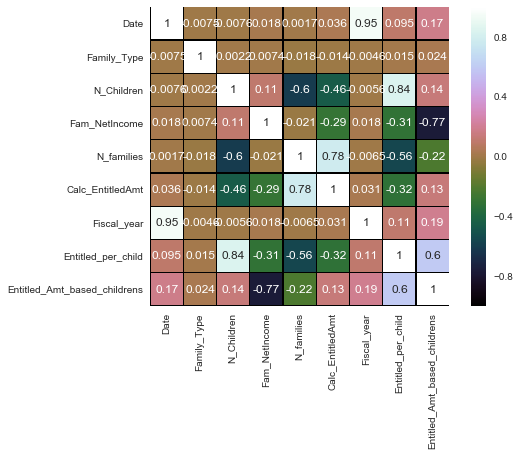

In [81]:
sns.heatmap(X_train.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
X_train.info()

In [82]:
Y = X_train.Entitled_Amt_based_childrens                #Get the dependent variable  
X = X_train[['Family_Type', 'Fam_NetIncome', 'Fiscal_year']]     #Get the independent variables
test_Y = X_test.Entitled_Amt_based_childrens                 #Get the dependent variable  
test_X = X_test[['Family_Type', 'Fam_NetIncome', 'Fiscal_year']]     #Get the independent variable
X = sm.add_constant(X)                  #Adding a constant for the linear regression equation
test_X = sm.add_constant(test_X)  
result = sm.OLS(Y.astype(float), X.astype(float)).fit() 
result.summary()                        #Diplay the result summary of the of the OLS function

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Entitled_Amt_based_childrens   R-squared:                       0.628
Model:                                      OLS   Adj. R-squared:                  0.628
Method:                           Least Squares   F-statistic:                     4077.
Date:                          Fri, 01 Dec 2017   Prob (F-statistic):               0.00
Time:                                  19:40:55   Log-Likelihood:                -31123.
No. Observations:                          7241   AIC:                         6.225e+04
Df Residuals:                              7237   BIC:                         6.228e+04
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8344.3803    297.669    -28.032      0.000   -8927.899   -7760.862
Family_Type       1.7995      0.418      4.300      0.000       0.979       2.620
Fam_NetIncome    -5.0791      0.047   -107.302      0.000      -5.172      -4.986
Fiscal_year       4.2095      0.148     28.467      0.000       3.920       4.499
==============================================================================
Omnibus:                      439.375   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.735
Skew:                          -0.570   Prob(JB):                    7.07e-125
Kurtosis:                       3.772   Cond. No.                     2.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
poly = PolynomialFeatures(degree=2)
X1 = poly.fit_transform(X)
t1 = poly.fit_transform(test_X)

model = LinearRegression()
model.fit(X1, Y)
y_predict = model.predict(t1)
rms = sqrt(mean_squared_error(test_Y, y_predict))
v = r2_score(test_Y, y_predict)
rms




14.012514031904562

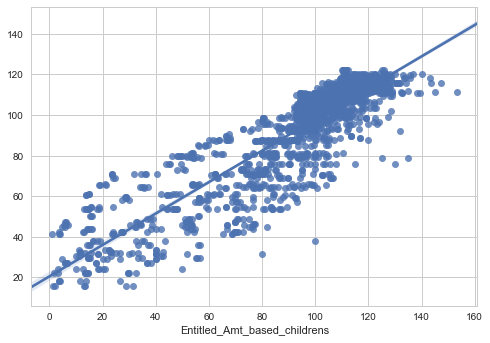

In [84]:
# Plot outputs
g2 = sns.regplot(x=test_Y, y=y_predict)

In [85]:
model1 = LinearRegression()
model1.fit(X, Y)
y_predict = model1.predict(test_X)
rms1 = sqrt(mean_squared_error(test_Y, y_predict))
v1 = r2_score(test_Y, y_predict)
rms1

17.927072309517307

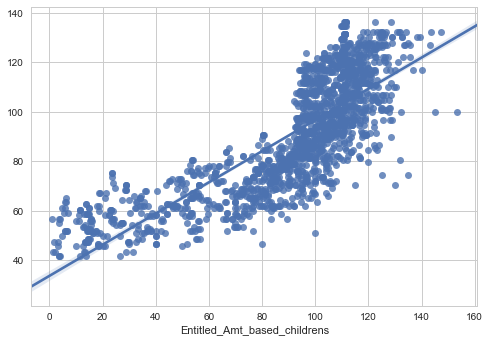

In [86]:
g21 = sns.regplot(x=test_Y, y=y_predict)